In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
import os
from os import path
import glob
from matplotlib.lines import Line2D

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# paths
eval_path = "/content/drive/MyDrive/mlt_final_project/evaluation_two"
dfs_path = path.join("/content/drive/MyDrive/mlt_final_project", "dfs")

In [4]:
# load into dataframe
def load_frames(paths):
  dfs = []
  for pth in paths:
    dfs.append(pd.read_csv(pth, names=['Name', 'Value']))
  return dfs

# load into dataframe
def load_frames_to_dep(path):
  paths = glob.glob(f'{path}/*.csv')
  dfs = []
  for pth in paths:
    df = pd.read_csv(pth, names=['Name', 'Value']).T
    df = pd.DataFrame(df.values[1:], columns=df.iloc[0])
    df.insert(1, "data", np.zeros(len(df)))
    df["data"] = pth.split("/")[-1]#.split(".")[0]

    dfs.append(df)
  return pd.concat(dfs, ignore_index=True)

def dependency_parsing(df):
  dep_names = df.loc[15:, 'Name'].to_list()
  dep_vals = df.loc[15:, 'Value'].to_list()
  return dep_names, dep_vals


# df = pd.read_csv(path.join(eval_path, "forward_trl_deen_0.csv"), names=['Name', 'Value'])
# dep_name_list = df.loc[15:, 'Name'].to_list()
# dep_val_list = df.loc[15:, 'Value'].to_list()
# print(type(dep_name_list))

In [5]:
df_en = load_frames_to_dep("/content/drive/MyDrive/mlt_final_project/evaluation_two/en/")
df_es = load_frames_to_dep("/content/drive/MyDrive/mlt_final_project/evaluation_two/es/")

In [ ]:
len(deps)
for dep in deps:
  print(len(dep[0]))

26
26
26
26
27
27


In [ ]:
type(plt.xticks)

function

In [ ]:
f_path = path.join("/content/drive/MyDrive/mlt_final_project/dfs", "pp_deen.en.csv")
df = pd.read_csv(f_path, header=0)

In [ ]:
df.loc[len(df)-1,:]

Unnamed: 0     1391194
Text          services
Lemma         services
Pos                ADJ
Tag                ADJ
Dep               flat
Shape             xxxx
Name: 1212389, dtype: object

In [ ]:
reseted_df = df.reset_index()
print(reseted_df.loc[0,:])
print(list(df.columns.values))
dropped_df = reseted_df.iloc[: , 2:]
filtered_df = dropped_df.loc[(dropped_df['Pos'] == "PROPN")]

index                  0
Unnamed: 0             0
Text          Resumption
Lemma         Resumption
Pos                PROPN
Tag                PROPN
Dep                 ROOT
Shape              Xxxxx
Name: 0, dtype: object
['Unnamed: 0', 'Text', 'Lemma', 'Pos', 'Tag', 'Dep', 'Shape']


In [ ]:
dropped_df.to_csv("/content/drive/MyDrive/mlt_final_project/en_test.csv")

In [ ]:
#/content/drive/MyDrive/mlt_final_project/evaluation_two/en/en_ref.csv
#/content/drive/MyDrive/mlt_final_project/evaluation_two/en/en_trl.2.csv
#/content/drive/MyDrive/mlt_final_project/evaluation_two/en/en_trl.1.csv
#/content/drive/MyDrive/mlt_final_project/evaluation_two/en/en_trl.3.csv
#/content/drive/MyDrive/mlt_final_project/evaluation_two/en/en_trl.4.csv
#/content/drive/MyDrive/mlt_final_project/evaluation_two/en/en_trl.0.csv

In [34]:
def deps_plot(deps):
  translation_tags = {"Fifth Trl": "purple", "Fourth Trl": "red", "Third Trl": "orange", "Second Trl": "green", "First Trl": "brown", "Ref Trl": "pink"}
  # dependency plots
  plt.figure(figsize=(20,5))
  plt.yscale('log')
  plt.margins(0.2)
  plt.subplots_adjust(bottom=0.2)
  plt.title("Syntactical dependencies")
  plt.xticks(ticks=np.arange(len(deps[0][0])), labels=deps[0][0], rotation='vertical')
  plt.plot(np.arange(len(deps[5][0])), deps[5][1], color='green', marker='x', linestyle='None')
  plt.plot(np.arange(len(deps[4][0])), deps[4][1], color='orange', marker='x', linestyle='None')
  plt.plot(np.arange(len(deps[3][0])), deps[3][1], color='red', marker='x', linestyle='None')
  plt.plot(np.arange(len(deps[2][0])), deps[2][1], color='purple', marker='x', linestyle='None')
  plt.plot(np.arange(len(deps[1][0])), deps[1][1], color='brown', marker='x', linestyle='None')
  plt.plot(np.arange(len(deps[0][0])), deps[0][1], color='pink', marker='x', linestyle='None')
  handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=v, label=k, markersize=8) for k, v in translation_tags.items()]
  plt.legend(title='Color', handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.tight_layout()
  plt.savefig("/content/drive/MyDrive/mlt_final_project/graphics/sentence_dep_es.pdf")
  plt.show()

In [35]:
en_pths = glob.glob(f'{eval_path}/en/*.csv')
es_pths = glob.glob(f'{eval_path}/es/*.csv')
#for pth in es_pths:
#  print(pth)
en_dfs = load_frames(es_pths)
ref_ar = np.asarray(en_dfs[0].loc[15:, 'Value'], dtype=float)
it_1_ar = np.asarray(en_dfs[5].loc[15:, 'Value'], dtype=float)
it_2_ar = np.asarray(en_dfs[2].loc[15:, 'Value'], dtype=float)
it_3_ar = np.asarray(en_dfs[1].loc[15:, 'Value'], dtype=float)
it_4_ar = np.asarray(en_dfs[3].loc[15:, 'Value'], dtype=float)
it_5_ar = np.asarray(en_dfs[4].loc[15:, 'Value'], dtype=float)
print(ref_ar[0])
print(it_1_ar[0])
print(it_2_ar[0])
print(it_3_ar[0])
print(it_4_ar[0])
print(it_5_ar[0])
#float_frames = [(en_df[0], np.asarray(en_df[1], dtype=float)) for en_df in en_dfs]
#es_dfs = load_frames(es_pths)
#en_deps = [dependency_parsing(df) for df in float_frames]
# es_deps = [dependency_parsing(df) for df in es_dfs]
#deps_plot(en_deps)

36446.0
37498.0
36455.0
36469.0
36470.0
43121.0


{'ROOT': 36446.0, 'nmod': 96833.0, 'appos': 9544.0, 'amod': 65188.0, 'obj': 61683.0, 'flat': 25435.0, 'obl': 38864.0, 'compound': 3981.0, 'conj': 39340.0, 'ccomp': 10264.0, 'nsubj': 43020.0, 'acl': 20362.0, 'fixed': 7972.0, 'advmod': 9994.0, 'advcl': 14958.0, 'csubj': 3871.0, 'dep': 531.0, 'xcomp': 8826.0, 'cop': 538.0, 'iobj': 567.0, 'aux': 4905.0, 'case': 462.0, 'det': 600.0, 'parataxis': 484.0, 'punct': 12.0, 'nummod': 279.0, 'mark': 62.0, 'cc': 23.0, 'expl:impers': nan, 'expl:pv': nan}
{'ROOT': 37498.0, 'nmod': 98275.0, 'appos': 10224.0, 'amod': 70924.0, 'obj': 68808.0, 'flat': 24385.0, 'obl': 43214.0, 'compound': 3671.0, 'conj': 38239.0, 'aux': 4846.0, 'advcl': 18512.0, 'fixed': 9913.0, 'nsubj': 43203.0, 'advmod': 12413.0, 'acl': 25163.0, 'ccomp': 11283.0, 'det': 875.0, 'csubj': 4732.0, 'xcomp': 11512.0, 'dep': 818.0, 'mark': 402.0, 'case': 965.0, 'cop': 585.0, 'iobj': 515.0, 'parataxis': 293.0, 'nummod': 531.0, 'punct': 73.0, 'cc': 45.0, 'expl:impers': 0.0, 'expl:pv': nan}
['ROOT

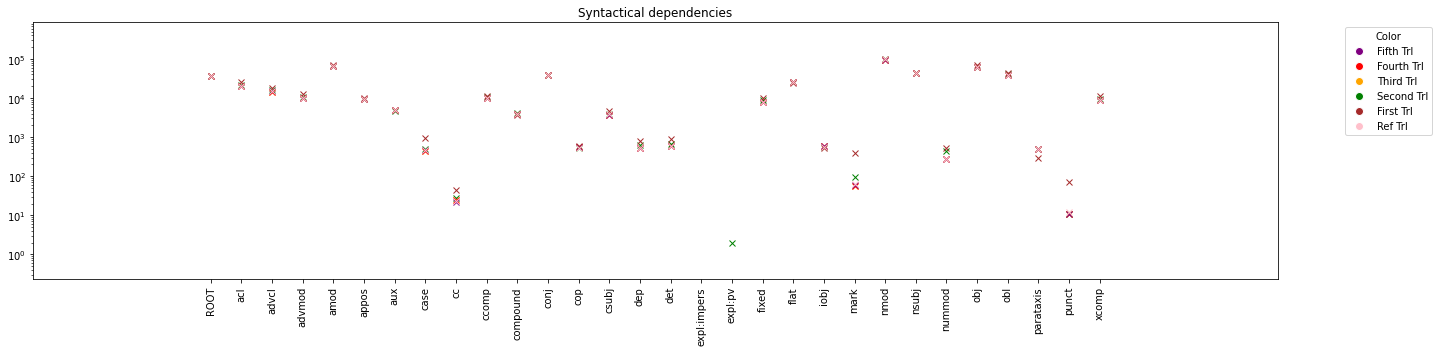

In [36]:
ref_name = np.asarray(en_dfs[0].loc[15:, 'Name'], dtype=str)
it_1_name = np.asarray(en_dfs[5].loc[15:, 'Name'], dtype=str)
it_2_name = np.asarray(en_dfs[2].loc[15:, 'Name'], dtype=str)
it_3_name = np.asarray(en_dfs[1].loc[15:, 'Name'], dtype=str)
it_4_name = np.asarray(en_dfs[3].loc[15:, 'Name'], dtype=str)
it_5_name = np.asarray(en_dfs[4].loc[15:, 'Name'], dtype=str)

ref_dict = dict(zip(list(ref_name), list(ref_ar)))
it_1_dict = dict(zip(list(it_1_name), list(it_1_ar)))
it_2_dict = dict(zip(list(it_2_name), list(it_2_ar)))
it_3_dict = dict(zip(list(it_3_name), list(it_3_ar)))
it_4_dict = dict(zip(list(it_4_name), list(it_4_ar)))
it_5_dict = dict(zip(list(it_5_name), list(it_5_ar)))


for key in ref_dict.keys():
  if key not in it_1_dict.keys():
    it_1_dict.update({key: np.nan})
  if key not in it_2_dict.keys():
    it_2_dict.update({key: np.nan})
  if key not in it_3_dict.keys():
    it_3_dict.update({key: np.nan})
  if key not in it_4_dict.keys():
    it_4_dict.update({key: np.nan})
  if key not in it_5_dict.keys():
    it_5_dict.update({key: np.nan})

for key in it_1_dict.keys():
  if key not in ref_dict.keys():
    ref_dict.update({key: np.nan})
  if key not in it_2_dict.keys():
    it_2_dict.update({key: np.nan})
  if key not in it_3_dict.keys():
    it_3_dict.update({key: np.nan})
  if key not in it_4_dict.keys():
    it_4_dict.update({key: np.nan})
  if key not in it_5_dict.keys():
    it_5_dict.update({key: np.nan})

for key in it_2_dict.keys():
  if key not in ref_dict.keys():
    ref_dict.update({key: np.nan})
  if key not in it_1_dict.keys():
    it_1_dict.update({key: np.nan})
  if key not in it_3_dict.keys():
    it_3_dict.update({key: np.nan})
  if key not in it_4_dict.keys():
    it_4_dict.update({key: np.nan})
  if key not in it_5_dict.keys():
    it_5_dict.update({key: np.nan})

for key in it_3_dict.keys():
  if key not in ref_dict.keys():
    ref_dict.update({key: np.nan})
  if key not in it_2_dict.keys():
    it_2_dict.update({key: np.nan})
  if key not in it_1_dict.keys():
    it_1_dict.update({key: np.nan})
  if key not in it_4_dict.keys():
    it_4_dict.update({key: np.nan})
  if key not in it_5_dict.keys():
    it_5_dict.update({key: np.nan})

for key in it_4_dict.keys():
  if key not in ref_dict.keys():
    ref_dict.update({key: np.nan})
  if key not in it_2_dict.keys():
    it_2_dict.update({key: np.nan})
  if key not in it_3_dict.keys():
    it_3_dict.update({key: np.nan})
  if key not in it_1_dict.keys():
    it_1_dict.update({key: np.nan})
  if key not in it_5_dict.keys():
    it_5_dict.update({key: np.nan})

for key in it_5_dict.keys():
  if key not in ref_dict.keys():
    ref_dict.update({key: np.nan})
  if key not in it_2_dict.keys():
    it_2_dict.update({key: np.nan})
  if key not in it_3_dict.keys():
    it_3_dict.update({key: np.nan})
  if key not in it_4_dict.keys():
    it_4_dict.update({key: np.nan})
  if key not in it_1_dict.keys():
    it_1_dict.update({key: np.nan})

ref_sorted = sorted(ref_dict.items())
it_1_sorted = sorted(it_1_dict.items())
it_2_sorted = sorted(it_2_dict.items())
it_3_sorted = sorted(it_3_dict.items())
it_4_sorted = sorted(it_4_dict.items())
it_5_sorted = sorted(it_5_dict.items())

func_items = [([it[0] for it in ref_sorted], [it[1] for it in ref_sorted]), 
              ([it[0] for it in it_1_sorted], [it[1] for it in it_1_sorted]),
              ([it[0] for it in it_2_sorted], [it[1] for it in it_2_sorted]),
              ([it[0] for it in it_3_sorted], [it[1] for it in it_3_sorted]),
              ([it[0] for it in it_4_sorted], [it[1] for it in it_4_sorted]),
              ([it[0] for it in it_5_sorted], [it[1] for it in it_5_sorted]),]

print(ref_dict)
print(it_1_dict)
print(func_items[0][0])
print(func_items[1][0])
print(it_4_sorted[1])
print(it_2_sorted[1])
deps_plot(func_items)

In [ ]:
# rects1 = ax.bar(x - width/2, men_means, width, label='Men')
# rects2 = ax.bar(x + width/2, women_means, width, label='Women')

In [ ]:
def df_to_gram_struct(df):
  noun = df.loc[0, 'Value']
  verb = df.loc[1, 'Value']
  adj = df.loc[3, 'Value']
  adv = df.loc[2, 'Value']
  return [noun, verb, adj, adv]


def plot_sentence_stuff(ref_trl, first_trl, second_trl, third_trl, fourth_trl, fifth_trl):
  cats = ["Nouns", "Verbs", "Adjectives", "Adverbs"]
  plt.figure(figsize=(12,5))
  # plt.margins(0.2)
  plt.subplots_adjust(bottom=0.15)
  width = 0.10  # the width of the bars
  x = np.arange(len(cats))
  plt.title("Grammatical constructs")
  plt.xticks(ticks=x, labels=cats, rotation='vertical')
  plt.bar(x - width * 2.5, ref_trl, width, label='Ref Trl')
  plt.bar(x - width * 1.5, first_trl, width, label='First Trl')
  plt.bar(x - width * 0.5, second_trl, width, label='Second Trl')
  plt.bar(x + width * 0.5, third_trl, width, label='Third Trl')
  plt.bar(x + width * 1.5, fourth_trl, width, label='Fourth Trl')
  plt.bar(x + width * 2.5, fifth_trl, width, label='Fifth Trl')
  plt.legend(title='Color', loc='upper right')
  plt.savefig('/content/drive/MyDrive/mlt_final_project/graphics/gram_struct_en_plot.pdf', bbox_inches='tight')
  plt.show()

In [ ]:
#/content/drive/MyDrive/mlt_final_project/evaluation_two/en/en_ref.csv
#/content/drive/MyDrive/mlt_final_project/evaluation_two/en/en_trl.2.csv
#/content/drive/MyDrive/mlt_final_project/evaluation_two/en/en_trl.1.csv
#/content/drive/MyDrive/mlt_final_project/evaluation_two/en/en_trl.3.csv
#/content/drive/MyDrive/mlt_final_project/evaluation_two/en/en_trl.4.csv
#/content/drive/MyDrive/mlt_final_project/evaluation_two/en/en_trl.0.csv

[241869. 117647.  83150.  21501.]
[230751. 103919.  80582.  19255.]
[231567. 104466.  80856.  19341.]
[230431. 103753.  80536.  19247.]
[230388. 103690.  80497.  19257.]
[235926. 105949.  81818.  19969.]


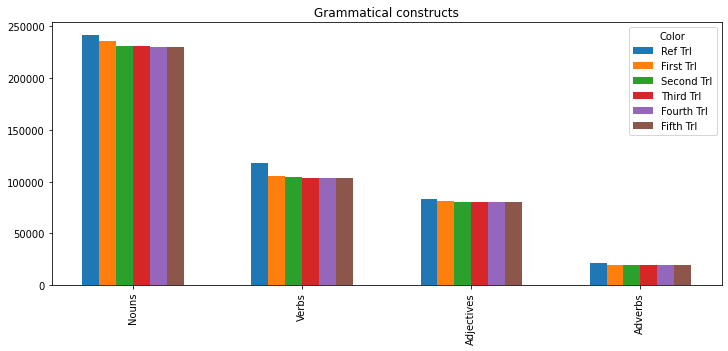

In [ ]:
float_structs = []
gram_structs = [df_to_gram_struct(df) for df in en_dfs] # ref_trl, first_trl, second_trl, third_trl, fourth_trl, fifth_trl
for struct in gram_structs:
  float_structs.append(np.asarray(struct, dtype=float))
for struct in float_structs:
  print(struct)
plot_sentence_stuff(float_structs[0], float_structs[5], float_structs[2], float_structs[1], float_structs[3], float_structs[4])

In [ ]:
# zip values for english vs spanish 2 bar plots (shannon, simpson, ttr)
def zip_values(df1, df2, key):
  overall_list = []
  value_set1 = df1[key].to_list()
  for index, elem in enumerate(value_set1):
    if type(elem) is str:
      value_set1[index] = float(elem.replace("(", "").replace(")", ""))
  value_set2 = df2[key].to_list()
  for index, elem in enumerate(value_set2):
    if type(elem) is str:
      value_set2[index] = float(elem.replace("(", "").replace(")", ""))
      
  for val1, val2 in zip(value_set1, value_set2):
    overall_list.append([val1, val2])
  return overall_list



In [ ]:
shannon_list = zip_values(df1=df_en, df2=df_es, key="shannon_entropy")

In [ ]:
print(shannon_list)

[[0.6504746949738115, 0.8083145212821647], [0.5299477657829158, 0.7915756007640912], [0.503606005711983, 0.7858671345099748], [0.4955233061093791, 0.7853379121814811], [0.4976456229163108, 0.7877487961538796], [0.4954578017769608, 0.7856523472393462]]


In [ ]:
# shannon_entropy
def shan_entr_plot(ref_trl, first_trl, second_trl, third_trl, fourth_trl, fifth_trl, precise=False):
  cats = ["English", "Spanish"]
  plt.figure(figsize=(12,5))
  # plt.margins(0.2)
  plt.subplots_adjust(bottom=0.15)
  width = 0.10  # the width of the bars
  x = np.arange(len(cats))
  plt.title("Shannon Entropy")
  if precise:
    list_array = np.array([ref_trl, first_trl, second_trl, third_trl, fourth_trl, fifth_trl])
    min = np.min(list_array)
    max = np.max(list_array)
    plt.ylim(min-0.1*min, max+0.1*max)

  #plt.xticks(ticks=x, labels=cats)
  plt.xticks(ticks=x, labels=cats)
  plt.bar(x - width * 2.5, ref_trl, width, label='Ref')
  plt.bar(x - width * 1.5, first_trl, width, label='First Trl')
  plt.bar(x - width * 0.5, second_trl, width, label='Second Trl')
  plt.bar(x + width * 0.5, third_trl, width, label='Third Trl')
  plt.bar(x + width * 1.5, fourth_trl, width, label='Fourth Trl')
  plt.bar(x + width * 2.5, fifth_trl, width, label='Fifth Trl')
  plt.legend(title='Color', loc="best")
  plt.savefig('/content/drive/MyDrive/mlt_final_project/graphics/shan_entr_en_es_plot.pdf', bbox_inches='tight')
  plt.show()

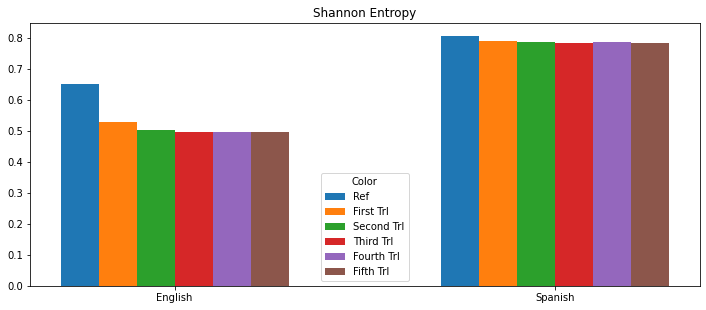

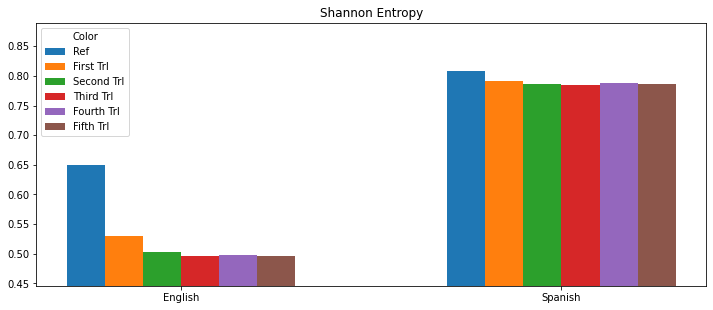

In [ ]:
shannon_list = zip_values(df1=df_en, df2=df_es, key="shannon_entropy")
shan_entr_plot(shannon_list[0], shannon_list[1], shannon_list[2], shannon_list[3], shannon_list[4], shannon_list[5])
shan_entr_plot(shannon_list[0], shannon_list[1], shannon_list[2], shannon_list[3], shannon_list[4], shannon_list[5], True)

In [ ]:
import numpy as np
# type token ratio (words and lemmas)
def ttr_plot(ref_trl, first_trl, second_trl, third_trl, fourth_trl, fifth_trl, precise=False):
  cats = ["English", "Spanish"]
  plt.figure(figsize=(12,5))
  # plt.margins(0.2)
  plt.subplots_adjust(bottom=0.15)
  width = 0.10  # the width of the bars
  x = np.arange(len(cats))
  if precise:
    list_array = np.array([ref_trl, first_trl, second_trl, third_trl, fourth_trl, fifth_trl])
    min = np.min(list_array)
    max = np.max(list_array)
    plt.ylim(min-0.1*min, max+0.1*max)
  plt.title("Type Token Ratio")
  plt.xticks(ticks=x, labels=cats)
  plt.bar(x - width * 2.5, ref_trl, width, label='Ref')
  plt.bar(x - width * 1.5, first_trl, width, label='First Trl')
  plt.bar(x - width * 0.5, second_trl, width, label='Second Trl')
  plt.bar(x + width * 0.5, third_trl, width, label='Third Trl')
  plt.bar(x + width * 1.5, fourth_trl, width, label='Fourth Trl')
  plt.bar(x + width * 2.5, fifth_trl, width, label='Fifth Trl')
  plt.legend(title='Color', loc='best')
  plt.savefig('/content/drive/MyDrive/mlt_final_project/graphics/ttr_en_es_plot.pdf', bbox_inches='tight')
  plt.show()

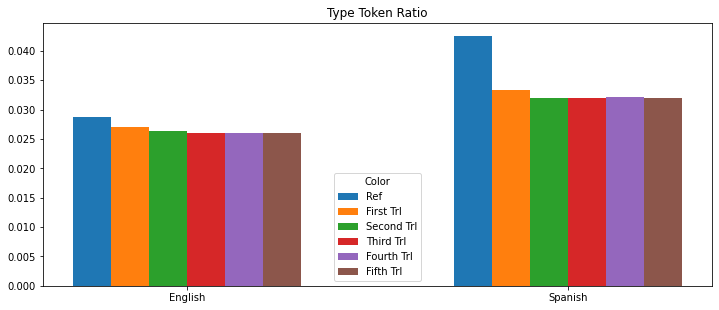

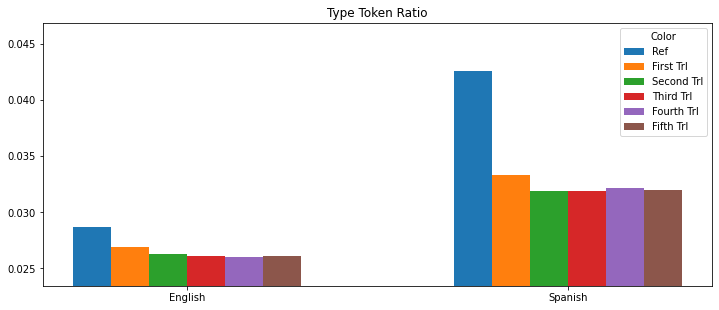

In [ ]:
shannon_list = zip_values(df1=df_en, df2=df_es, key="TTR_lemmas") #
ttr_plot(shannon_list[0], shannon_list[1], shannon_list[2], shannon_list[3], shannon_list[4], shannon_list[5])
ttr_plot(shannon_list[0], shannon_list[1], shannon_list[2], shannon_list[3], shannon_list[4], shannon_list[5], True)

In [ ]:
# simpsons diversity
def simps_div_plot(ref_trl, first_trl, second_trl, third_trl, fourth_trl, fifth_trl, precise=False):
  cats = ["English", "Spanish"]
  plt.figure(figsize=(12,5))
  # plt.margins(0.2)
  plt.subplots_adjust(bottom=0.15)
  width = 0.10  # the width of the bars
  x = np.arange(len(cats))
  plt.title("Simpson Diversity")
  if precise:
    list_array = np.array([ref_trl, first_trl, second_trl, third_trl, fourth_trl, fifth_trl])
    min = np.min(list_array)
    max = np.max(list_array)
    plt.ylim(min-0.01*min, max+0.01*max)
  plt.xticks(ticks=x, labels=cats)
  plt.bar(x - width * 2.5, ref_trl, width, label='Ref')
  plt.bar(x - width * 1.5, first_trl, width, label='First Trl')
  plt.bar(x - width * 0.5, second_trl, width, label='Second Trl')
  plt.bar(x + width * 0.5, third_trl, width, label='Third Trl')
  plt.bar(x + width * 1.5, fourth_trl, width, label='Fourth Trl')
  plt.bar(x + width * 2.5, fifth_trl, width, label='Fifth Trl')
  plt.legend(title='Color', loc='best')
  plt.savefig('/content/drive/MyDrive/mlt_final_project/graphics/simps_div_en_es_plot.pdf', bbox_inches='tight')
  plt.show()

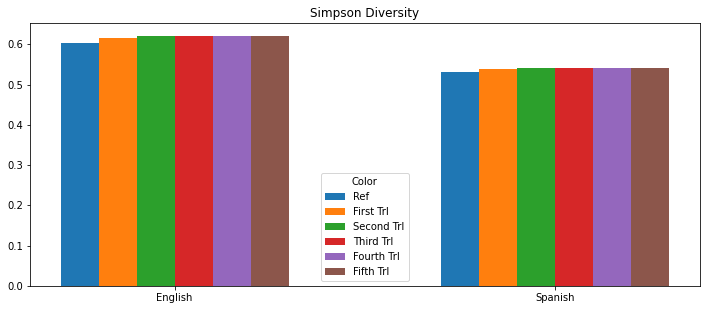

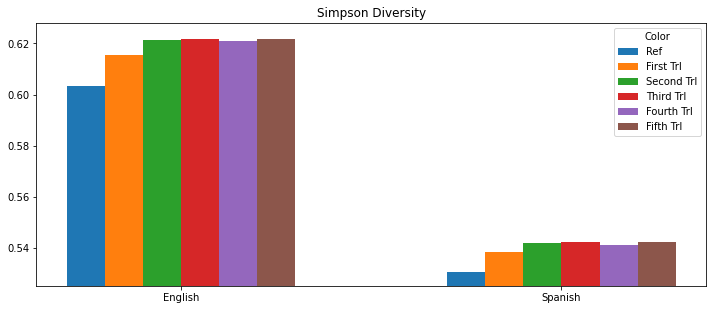

In [ ]:
shannon_list = zip_values(df1=df_en, df2=df_es, key="simpson_diversity") #
simps_div_plot(shannon_list[0], shannon_list[1], shannon_list[2], shannon_list[3], shannon_list[4], shannon_list[5])
simps_div_plot(shannon_list[0], shannon_list[1], shannon_list[2], shannon_list[3], shannon_list[4], shannon_list[5], True)

In [ ]:

def lexical_freq_plot(ref_trl, first_trl, second_trl, third_trl, fourth_trl, fifth_trl, language, precise=False):
  plt.figure(figsize=(12,5))
  cats = ["1000 most common words", "1000 to 2000 most common words", "Remaining words"]
  # plt.margins(0.2)
  plt.subplots_adjust(bottom=0.15)
  width = 0.10  # the width of the bars
  x = np.arange(len(cats))
  plt.title("Lexical Frequency Profile {language}".format(language=language))
  if precise:
    list_array = np.array([ref_trl, first_trl, second_trl, third_trl, fourth_trl, fifth_trl])
    min = np.min(list_array)
    max = np.max(list_array)
    plt.ylim(min-0.1*min, max+0.1*max)
  plt.xticks(ticks=x, labels=cats)
  plt.bar(x - width * 2.5, ref_trl, width, label='Ref')
  plt.bar(x - width * 1.5, first_trl, width, label='First Trl')
  plt.bar(x - width * 0.5, second_trl, width, label='Second Trl')
  plt.bar(x + width * 0.5, third_trl, width, label='Third Trl')
  plt.bar(x + width * 1.5, fourth_trl, width, label='Fourth Trl')
  plt.bar(x + width * 2.5, fifth_trl, width, label='Fifth Trl')
  plt.legend(title='Color', loc='upper right')
  plt.savefig('/content/drive/MyDrive/mlt_final_project/graphics/lexical_freq_{language}_plot.pdf'.format(language=language), bbox_inches='tight')
  plt.show()

In [ ]:
def zip_values_lf(df, key_list):
  overall_list = []
  for key in key_list:
    elems = df[key].to_list()
    for i, elem in enumerate(elems):
      #print(elem)
      elems[i] = float(elem)
      #print(elems[i])
    overall_list.append(elems)
  
  #print(np.array(overall_list))
  #print(np.array(overall_list).T)
  return np.array(overall_list).T

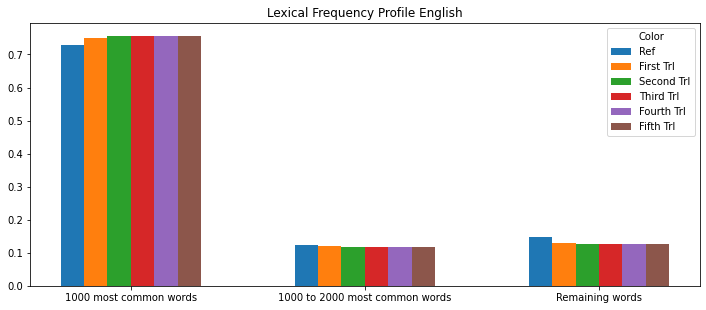

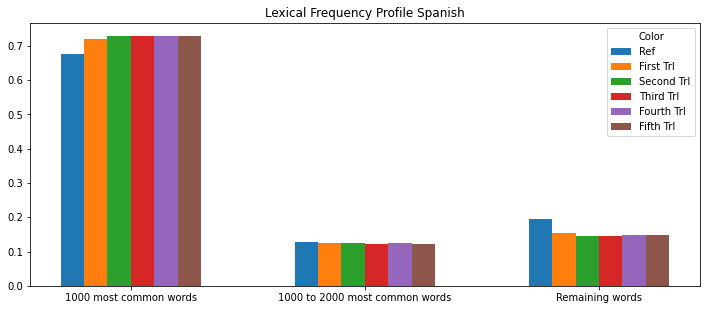

In [ ]:
en_freq = zip_values_lf(df_en, key_list=['lexical_frequency_first_thousand', 'lexical_frequency_second_thousand',
       'lexical_frequency_third_thousand']) #
#print(en_freq)
es_freq = zip_values_lf(df_es, key_list=['lexical_frequency_first_thousand', 'lexical_frequency_second_thousand',
       'lexical_frequency_third_thousand'])
lexical_freq_plot(en_freq[0], en_freq[1], en_freq[2], en_freq[3], en_freq[4], en_freq[5], "English")
#lexical_freq_plot(en_freq[0], en_freq[1], en_freq[2], en_freq[3], en_freq[4], en_freq[5], "English", True)

lexical_freq_plot(es_freq[0], es_freq[1], es_freq[2], es_freq[3], es_freq[4], es_freq[5], "Spanish")
#lexical_freq_plot(es_freq[0], es_freq[1], es_freq[2], es_freq[3], es_freq[4], es_freq[5], "Spanish", True)
